In [ ]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [21]:
data = pd.read_csv('C:/Users/maxim/Documents/bieres.csv',encoding='latin-1')
#print(data)
x = data["FG"].values
y = data["OG"].values
#a1 = data["Color"].values
#a2 = data["IBU"].values
#a3 = data["ABV"].values


In [22]:
#tableau
#X = np.array(list(zip(x, y,a1,a2,a3)))
X = np.array(list(zip(x, y)))
print(X)

[[  1.018   1.063   8.98   59.25    5.91 ]
 [  1.017   1.061   8.5    54.48    5.8  ]
 [  1.013   1.055   8.     40.12    5.58 ]
 ..., 
 [  1.016   1.064   9.6     0.      6.26 ]
 [  1.014   1.065   4.73   49.35    6.71 ]
 [  1.01    1.06    8.65   57.09    6.55 ]]


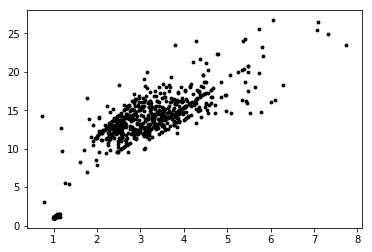

In [24]:
plt.scatter(x, y, c='black',s=8)

In [25]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [26]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X), size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[[  947.   554.]
 [  843.  1270.]
 [ 1114.   563.]]


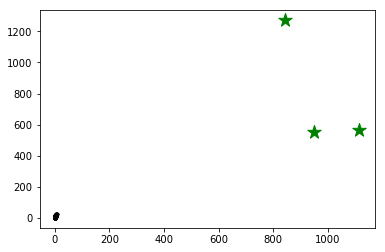

In [27]:
plt.scatter(x, y, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

In [28]:
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

ValueError: operands could not be broadcast together with shapes (5,) (3,2) 

In [ ]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')